In [1]:
bold = '\033[1m' 
end = '\033[0m'

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image 
import math
plt.style.use('ggplot')

In [2]:
prob1_13 = pd.read_excel('Chapter1.xlsx', sheet_name='Prob1.13')
prob1_15 = pd.read_excel('Chapter1.xlsx', sheet_name='Prob1.15')
prob1_16 = pd.read_excel('Chapter1.xlsx', sheet_name='Prob1.16')
prob1_17 = pd.read_excel('Chapter1.xlsx', sheet_name='Prob1.17')

In [3]:
print(prob1_13.head())
print(prob1_13.shape)

   JanPapers
0    19.1934
1    15.0834
2     9.5556
3     4.2003
4     5.4189
(85, 1)


In [4]:
print(prob1_15.head())
print(prob1_15.shape)

   SafetyIncidents
0                1
1                0
2                0
3                0
4                2
(48, 1)


In [5]:
print(prob1_16.head())
print(prob1_16.shape)

   Before WT  After WT
0        272       263
1        319       313
2        253       251
3        325       312
4        236       227
(20, 2)


In [6]:
print(prob1_17.head())
print(prob1_17.shape)

   x  yO  yY
0  0  32   8
1  1  41  25
2  2  21  35
3  3   5  23
4  4   1   8
(6, 3)


# `Application Problems`

# Exercise 1.13

The data set in the table below is the time (in months) from receipt to publication (sometimes known as ``time-to-publication``) of 85 papers published in the January 2004 issue of a leading chemical engineering research journal.

<table><tr><td><img src='Prob1_13.png' width=300></td></tr></table>


(i) Generate a histogram of this data set. Comment on the ``shape`` of this histogram and why, from the nature of the variable in question, such a shape may not be surprising.

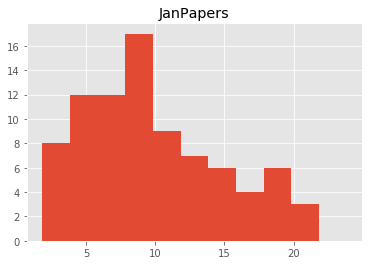

In [7]:
hist_data = plt.hist(prob1_13.JanPapers, bins=np.arange(prob1_13.min(), prob1_13.max(), 2))
plt.grid(True)
plt.title('JanPapers')
plt.show()

Most of the papers submitted are published within a year of submission. Few take longer than that. Thus the shape of this histogram is not surprising. It models the same information.

(ii) From the histogram of the data, what is the ``most popular`` time-to-publication, and what fraction of the papers took longer than this to publish?

In [8]:
total_papers = prob1_13.shape[0]

prob13_hist = pd.DataFrame(hist_data[0], columns=['frequency'])

prob13_hist['interval_start'] = hist_data[1][:-1]
prob13_hist['interval_stop'] = hist_data[1][1:]

print(prob13_hist)

most_popular = prob13_hist.iloc[prob13_hist.frequency.values.argmax()]

print("\n\nThe most popular time-to-publication is between {} to {} months. In the data given above {} papers (about {}%) \
got published within this time.".format(
    most_popular['interval_start'].round(),
    most_popular['interval_stop'].round(),
    most_popular['frequency'],
    (most_popular['frequency']*100/total_papers).round(),
))


longer_pub_time = prob13_hist[prob13_hist['interval_start'] >= most_popular['interval_stop']]
longer_pub_time_precentage = longer_pub_time['frequency'].sum()*100/total_papers

print("\n{}% papers took longer than {} months to publish.".format(
    longer_pub_time_precentage.round(), 
    most_popular['interval_stop'].round(),
))

    frequency  interval_start  interval_stop
0         8.0          1.8254         3.8254
1        12.0          3.8254         5.8254
2        12.0          5.8254         7.8254
3        17.0          7.8254         9.8254
4         9.0          9.8254        11.8254
5         7.0         11.8254        13.8254
6         6.0         13.8254        15.8254
7         4.0         15.8254        17.8254
8         6.0         17.8254        19.8254
9         3.0         19.8254        21.8254
10        0.0         21.8254        23.8254


The most popular time-to-publication is between 8.0 to 10.0 months. In the data given above 17.0 papers (about 20.0%) got published within this time.

41.0% papers took longer than 10.0 months to publish.


# Exercise 1.14

Refer to Problem 1.13. Let each raw data entry in the data table be $x_i$.

(i) Generate a set of 85 `sample average publication time`, $y_i$, from 20 consecutive times as follows: <br> <br>
$$
y_1 = \frac{1}{20} \sum_{i=1}^{20} x_i \\
y_2 = \frac{1}{20} \sum_{i=2}^{21} x_i \\
y_3 = \frac{1}{20} \sum_{i=3}^{22} x_i \\
{\ldots} = \ldots \nonumber \\
y_j = \frac{1}{20} \sum_{i=j}^{20+ (j-1)} x_i
$$

For values of $j \geq 66$, $y_j$ should be obtained by replacing $x_{86},
x_{87}, x_{88}, \ldots, $  which do not exist,  with $x_1, x_2, x_3, \ldots, $
respectively (i.e., for these purposes treat the given $x_i$ data like a
`circular array`).  Plot the histogram for this generated $y_i$ data and compare the shape of this histogram with that of the original $x_i$ data.



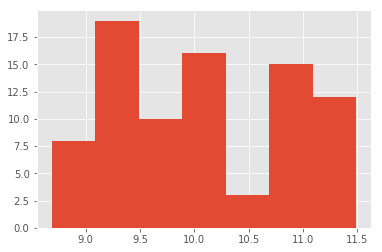

In [9]:
Yj = []

window = 20
for i in range(total_papers):
    j = i + window
    if j > total_papers:
        avg = prob1_13.JanPapers[i:total_papers].sum()
        avg += prob1_13.JanPapers[:j-total_papers].sum()
    else:
        avg = prob1_13.JanPapers[i:j].sum()
    
    Yj.append(avg/window)

hist_data = plt.hist(Yj, bins=np.arange(min(Yj), max(Yj), 0.4))
plt.grid(True)
plt.show()

> #### `Observations:`

> The shape of this histogram is very different from the previous one. This histogram is almost evenly distributed whereas the previous one showed decrease in frequency after some point.

(ii) Repeat part (i) above, this time for $z_i$ data generated from:
$$
z_j  =  \frac{1}{20} \sum_{i=j}^{20+ (j-1)} y_i
$$
for $j=1,2, \ldots, 85$.  Compare the histogram of the $z_i$ data with that of
the $y_i$ data and comment on the effect of `averaging` on the shape of the
data histograms.

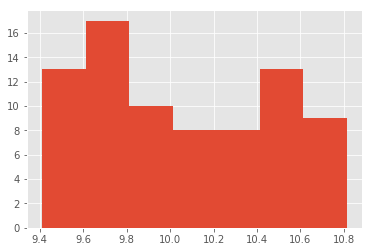

In [10]:
Zi = []

for i in range(total_papers):
    j = i + window
    if j > total_papers:
        avg = sum(Yj[i:total_papers])
        avg += sum(Yj[:j-total_papers])
    else:
        avg = sum(Yj[i:j])
    
    Zi.append(avg/window)
    
hist_data = plt.hist(Zi, bins=np.arange(min(Zi), max(Zi), 0.2))
plt.grid(True)
plt.show()

> #### `Observations:`

> The shape of this histogram is very similar to that of the previous one. Continued averaging seems to be distributing frequency more and more evenly with every iteration.

# Exercise 1.15

The data shown in table below is a four-year record of the number of `recordable` safety incidents occurring at a plant site each month.

<table><tr><td><img src='Prob1_15.png' width=500></td></tr></table>


(i) Find the average number of safety incidents per month and the associated variance. Construct a frequency table of the data and plot a histogram.



–––––––– Results without Bessel's correction for Variance: ––––––––
Average: 0.5 
Variance: 0.5




–––––––– Results with Bessel's correction for Variance: ––––––––
Average: 0.5 
Variance: 0.5106382978723404




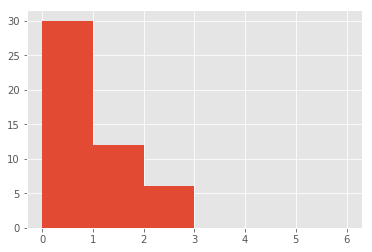

,frequency
0,30.0
1,12.0
2,6.0
3,0.0
4,0.0
5,0.0


In [11]:
avg_inc = prob1_15.values.mean()
var_inc = prob1_15.values.var()
print(bold + "\n\n{} Results without Bessel's correction for Variance: {}".format('–'*8, '–'*8) + end)
print("Average: {} \nVariance: {}\n\n".format(avg_inc, var_inc))


avg_inc = prob1_15.values.mean()
var_inc = prob1_15.values.var(ddof=1)
print(bold + "\n\n{} Results with Bessel's correction for Variance: {}".format('–'*8, '–'*8) + end)
print("Average: {} \nVariance: {}\n\n".format(avg_inc, var_inc))



hist_data = plt.hist(prob1_15.values, bins=[0,1,2,3,4,5,6])
plt.grid(True)
plt.show()

freq_table = pd.DataFrame(hist_data[0], index=hist_data[1][:-1], columns=['frequency'])
freq_table

(ii) From the frequency table and the histogram, what can you say about the `chances` of obtaining each of the following observations, where $x$ represents the number of observed safety incidents per month: $x=0,  x=1, x=2, x=3, x=4$ and $x=5$?

In [12]:
freq_table['chances'] = freq_table.frequency/freq_table.frequency.sum()
freq_table

,frequency,chances
0,30.0,0.625
1,12.0,0.250
2,6.0,0.125
3,0.0,0.000
4,0.0,0.000
5,0.0,0.000


> #### `Observations:`

> As shown in the above table and histogram, there are high chances of having no safety incidents at all in a month. The chances keep on decreasing as the number of incidents increase from 0-2 and vanishes for 3 or more incidents.

(iii) Consider the postulate that a reasonable model for this phenomenon is:
$$
f(x) = \frac{e^{-0.5}{0.5^{x}}} {x!}
$$
where $f(x)$ represents the theoretical `probability` of recording exactly $x$ safety incidents per month.  How well does this model fit the data?


In [13]:
def function_of_x(x, lmbda=0.5):
    value = (np.exp(-lmbda)*(lmbda**x))/math.factorial(x)
    return value

theoretical_probability = []
for x in freq_table.index.values:
    theoretical_probability.append(function_of_x(x))
    
freq_table['theoretical_probability'] = theoretical_probability
freq_table['difference'] = freq_table['theoretical_probability'] - freq_table['chances']

freq_table['difference_percentage'] = (freq_table['difference']*100)/freq_table['theoretical_probability']
freq_table

,frequency,chances,theoretical_probability,difference,difference_percentage
0,30.0,0.625,0.606531,-0.018469,-3.045079
1,12.0,0.250,0.303265,0.053265,17.563936
2,6.0,0.125,0.075816,-0.049184,-64.872127
3,0.0,0.000,0.012636,0.012636,100.000000
4,0.0,0.000,0.001580,0.001580,100.000000
5,0.0,0.000,0.000158,0.000158,100.000000


> #### `Observations:`

> The model fit the data pretty well. 'Chances' and 'Theoretical_probability' are close. According to the model, the theoretical_probability decreases sharply with increase in number of safety_incidents which is actually the case.

(iv) Assuming that this is a reasonable model, discuss how you would use it to answer the question: ``If, over the most recent four-month period, the plant recorded 1, 3, 2, 3 safety incidents respectively, is there evidence that there has been a 'real increase' in the number of safety incidents``? 

# Exercise 1.16

The table below shows a record of the `before` and `after` weights (in pounds) of 20 patients enrolled in a clinically-supervised ten-week weight-loss program.

Let $X_B$ represent the `Before` weight and $X_A$ the `After` weight.

<table><tr><td><img src='Prob1_16.png' width=600></td></tr></table>

(i) Using the same bin size for each data set, obtain histograms for the $X_B$ and $X_A$ data and plot both on the same graph. Strictly on the basis of a  visual inspection of these histograms, what can you say about the effectiveness of the weight-loss program in achieving its objective of assisting patients to lose weight?



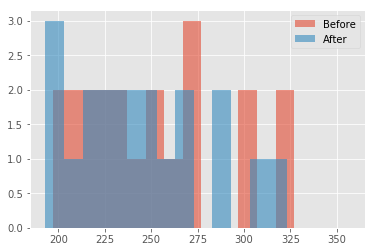

In [14]:
bin_size = 10

hist_data_before = plt.hist(
    prob1_16['Before WT'], 
    bins=np.arange(prob1_16['Before WT'].min(), prob1_16['Before WT'].max(), bin_size),
    label='Before',
    alpha=0.6,
)

hist_data_after = plt.hist(
    prob1_16['After WT'], 
    bins=np.arange(prob1_16['After WT'].min(), prob1_16['After WT'].max(), bin_size), 
    label='After',
    alpha=0.6,
)

plt.legend()
plt.grid(True)
plt.show()

> #### `Observations:`

> The 'after' histogram is more on the left as compared to the 'before' one. Also, the frequencies in the 'after' graph are decreasing with increase in weight whereas this is not the case with 'before' graph.

> This suggests that the weight-loss program was effective.

(ii) Define the difference variable, $D= X_B - X_A$, and from the given data, obtain and plot a histogram for this variable. Again, strictly from a  visual inspection of this histogram, what can you say about the effectiveness of the weight-loss program?

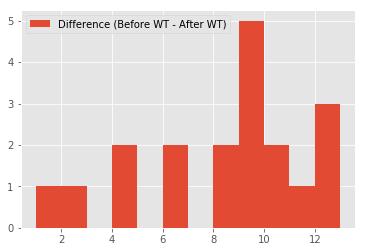

In [15]:
prob1_16['diff'] = prob1_16['Before WT'] - prob1_16['After WT']

bin_size = 1
hist_data_diff = plt.hist(
    prob1_16['diff'], 
    bins=np.arange(prob1_16['diff'].min(), prob1_16['diff'].max(), bin_size), 
    label='Difference (Before WT - After WT)',
)

plt.legend()
plt.grid(True)
plt.show()

> #### `Observations:`

> 1. None of the values are negative or even zero indicating that there was atleast a drop of 1 pound for every individual.

> 2. The right side of the histogram is heavily populated which means that most people lost betwenn 8-12 pounds.

# Exercise 1.17

The data shown in the table below is from an `Assisted Reproductive Technologies` clinic where a cohort of 100 patients under the age of 35 years (the `Younger` group), and  another cohort, 35 years and older (the `Older` group), each received five embryos in an in-vitro fertilization (IVF) treatment cycle.

<table><tr><td><img src='Prob1_17.png' width=600></td></tr></table>


The data shows $x$, the number of live births per delivered pregnancy, along with how many in each group had the pregnancy outcome of $x$. For example, the first entry indicates that the IVF treatment  was unsuccessful for 32 of the `older` patients, with the corresponding number being 8 for the `younger` patients; 41 `older` patients delivered singletons, compared with 25 for the younger patients; 21 older patients and 35 younger patients each delivered twins; etc. Obtain a `relative` frequency distribution for these data sets and plot the corresponding histograms.

   x  yO  yY  r_freq_yO  r_freq_yY  combined_r_freq
0  0  32   8       0.32       0.08            0.200
1  1  41  25       0.41       0.25            0.330
2  2  21  35       0.21       0.35            0.280
3  3   5  23       0.05       0.23            0.140
4  4   1   8       0.01       0.08            0.045
5  5   0   1       0.00       0.01            0.005


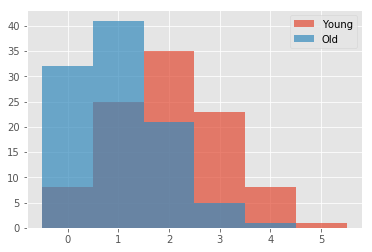

In [16]:
total_patients = prob1_17['yO'].sum()

prob1_17['r_freq_yO'] = prob1_17['yO']/total_patients
prob1_17['r_freq_yY'] = prob1_17['yY']/total_patients
prob1_17['combined_r_freq'] = (prob1_17['yO'] + prob1_17['yY'])/(2*total_patients)

print(prob1_17)

bin_size = 1

plt.bar(
    prob1_17['x'], 
    prob1_17['yY'],
    label='Young',
    alpha=0.7,
    width=1,
)

plt.bar(
    prob1_17['x'], 
    prob1_17['yO'],
    label='Old',
    alpha=0.7,
    width=1,
)

plt.legend()
plt.grid(True)
plt.show()




Determine the average number of live births per delivered pregnancy for each group and compare these values.  Comment on whether or not these data sets indicate that the outcomes of the IVF treatments are different for these two groups.

In [17]:
avg_young = (prob1_17['yY']*prob1_17['x']).values.sum()/total_patients
avg_old = (prob1_17['yO']*prob1_17['x']).values.sum()/total_patients

print("The average number of live births per delivered pregnancy for - ");
print("Young: ", avg_young)
print("Old: ", avg_old)

The average number of live births per delivered pregnancy for - 
Young:  2.01
Old:  1.02


> #### `Observation:`

> 1. By looking at the histograms, we can see that the histogram for 'Old' people is heavily populated on left side whereas the one for 'Young' people is almost balanced on both sides. From this we can say that 'Old' people have less number of live birts as compared to 'Young' people.
> 2. Using the Average statistic, observation 1 is confirmed.
> 3. We can say that the IVF treatment has different results for the two groups. It is more effective for younger people.